In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('./data2.csv')
df.head()


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


The model has 66.45% accuracy.


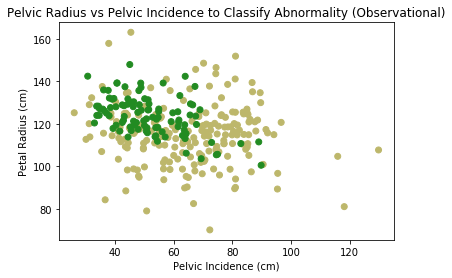

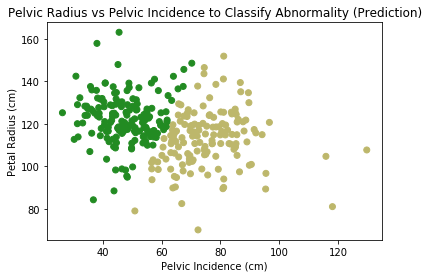

In [43]:
colorlist = []
classlist = {}
import matplotlib


colors = [name for name, hex in matplotlib.colors.cnames.items()]
colorlist = []
random.Random(0).shuffle(colors)
colorsused = []
for item in df['class']:
    if item not in classlist:
        classlist.update({item:colors[0]})
        colorsused.append(colors[0])
        del colors[0]
    colorlist.append(classlist[item])

    
class K_Means:
    def __init__(self, k=2, tol=0.0001, max_iter=500):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
#                     print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


clf = K_Means(len(classlist))
X = np.array(list(map(list, zip(df['pelvic_incidence'], df['pelvic_radius']))))
clf.fit(X)
y=[a != 'Abnormal' for a in df['class']]
a = []
b = []
c = []
correct = 0
for i in range(len(X)):

    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    a.append(predict_me[0][0])
    b.append(predict_me[0][1])
    c.append(prediction)
    if prediction == y[i]:
        correct += 1

print("The model has %s%% accuracy." % str(round((correct/len(X)*100),2)))

# clf.fit(zi)

# for centroid in clf.centroids:
#     plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
#                 marker="o", color="k", s=150, linewidths=5)

# for classification in clf.classifications:
#     color = colors[classification]
#     for featureset in clf.classifications[classification]:
#         plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
# plt.show()
plt.scatter(df['pelvic_incidence'], df['pelvic_radius'], color=colorlist)

plt.title('Pelvic Radius vs Pelvic Incidence to Classify Abnormality (Observational)')
plt.xlabel('Pelvic Incidence (cm)')
plt.ylabel('Petal Radius (cm)')
plt.show()

plt.show()
plt.scatter(a, b, color=[colorsused[i] for i in c])

plt.title('Pelvic Radius vs Pelvic Incidence to Classify Abnormality (Prediction)')
plt.xlabel('Pelvic Incidence (cm)')
plt.ylabel('Petal Radius (cm)')
plt.show()



